In [55]:
import numpy as np
import pandas as pd

# Problem Understanding

The National Health Service has determined that decisive action to treat diabetes is necessary. However, diagnosing it takes hours of doctors that are in high demand.<br>

Help them to predict who is diabetic and who is not based on data that non-medical stuff can obtain so that you reduce the number of people who:
- get treated without needing it
- don't get treated when they actually needed it

# Data Understanding

https://data.world/data-society/pima-indians-diabetes-database

In [56]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Data preparation

### Split your X data in train and test datasets
Here is the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Split your train data in train and validation datasets

In [59]:
from sklearn.model_selection import train_test_split
X_train_s, X_val, y_train_s, y_val = train_test_split(X_train, y_train)

### Scale the 3 datasets using StandardScaler

In [60]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(X_train_s)

X_train_scaled = scaler.transform(X_train_s)
X_val_scaled = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling and Model Evaluation

### Train a logistic regression model with NO regularisation

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='none',  solver='lbfgs')
model_log = logreg.fit(X_train_scaled, y_train_s)

### Measure the accuracy and ROC_AUC of your model
Here is the documentation: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [62]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_train_log = logreg.predict(X_train_scaled)

print('Accuracy:', accuracy_score(y_train_s, y_train_log))
print('The ROC&AUC is:', roc_auc_score(y_train_s, y_train_log))

Accuracy: 0.7592592592592593
The ROC&AUC is: 0.7018521592714682


### Train a logistic regression model with L1 regularisation

In [63]:
logreg_l = LogisticRegression(penalty='l1',  solver='liblinear')
logreg_l.fit(X_train_scaled, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Measure the accuracy and ROC_AUC of your model


In [64]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_train_log_las = logreg_l.predict(X_train_scaled)
train_prob_l = logreg_l.predict_proba(X_train_scaled)[:,1]

print('Accuracy:',accuracy_score(y_train_s, y_train_log_las))
print('The ROC&AUC is: ', roc_auc_score(y_train_s, train_prob_l))

Accuracy: 0.7638888888888888
The ROC&AUC is:  0.8058908625228259


## Which model did you choose? Explain your reasoning

In [65]:
# ???????????????????????????????????????
# 
# 
# 
# 

# Interprete your winning model

### Extract your intercept and coefficients

In [66]:
parameters = logreg_l.coef_
inter = logreg_l.intercept_
cols = list(X.columns)
print(cols)
print('The coefficients are ', parameters.round(2))
print('The intercept of the regression is', inter.round(2))


['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
The coefficients are  [[ 0.29  0.96 -0.29  0.15 -0.32  0.52  0.27  0.23]]
The intercept of the regression is [-0.82]


### Show the difference in probabilities when changing the value of one of your predictors

In [67]:
bp_50 = 50
bp_80 = 80

bp_coef = parameters[0][2]

#convert log-odds to odds

log_odds = inter + (bp_coef*bp_50)
odds = np.exp(log_odds)
odds


prob_50 = odds/(1+odds)
print('Probability of 50 = ', prob_50)

Probability of 50 =  [2.16492518e-07]


In [68]:
log_odds_2 = inter + (bp_coef*bp_80)
odds_2 = np.exp(log_odds_2)
odds_2


prob_80 = odds_2/(1+odds_2)
print('Probability of 80 = ', prob_80)


Probability of 80 =  [3.54341976e-11]


In [69]:
# print(logreg.predict_proba(X_train_scaled)[0:10, 7])

### Extract the probability of a positive for your validation samples

In [70]:
prob_val = logreg_l.predict_proba(X_val_scaled)[:,1]


In [71]:
# print('true:', y_val[0:25])
# print('false:', y_val_log[0:25])

In [72]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_val, y_val_log)

print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]


NameError: name 'y_val_log' is not defined

In [73]:
y_val.value_counts().head(1)/len(y_val)

0    0.645833
Name: Outcome, dtype: float64

### Extract FPR, TPR and thresholds

In [74]:
from sklearn.metrics import  roc_curve

In [75]:
# Calculate the probability scores of each point in the training set
y_train_score = logreg_l.predict_proba(X_train_scaled)
train_fpr, train_tpr, thresholds_train = roc_curve(y_train_s, y_train_score[:,1])

y_val_score = logreg_l.predict_proba(X_val_scaled)
val_fpr, val_tpr, val_threshold = roc_curve(y_val, y_val_score[:,1])


y_test_score = logreg_l.predict_proba(X_test)
test_fpr, test_tpr, thresholds_test = roc_curve(y_test, y_test_score[:,1])

### Plot the ROC curves for your training, validation (and, if you are done, test) datasets

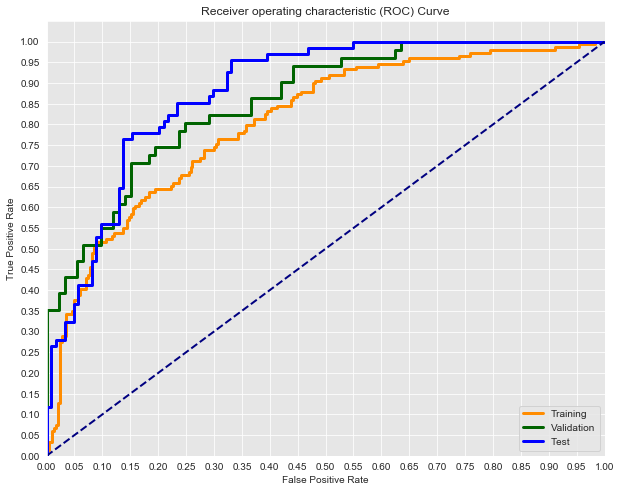

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='darkorange',lw=3, label='Training')
plt.plot(val_fpr, val_tpr, color='darkgreen',lw=3, label='Validation')
plt.plot(test_fpr, test_tpr, color='blue', lw=3, label='Test')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Threshold selection

### Estimate the prevalence in the environment where your model will be used

In [77]:
# Prevalence = N ALL POSITIVE / N TOTAL
Pre =  105 / 165

### Estimate the costs for each unit of your FPs, TNs, FNs and TPs
**Hint:** You don't have data for this. You will have to do some research and deep thinking<br>
**Hint 2:** think of a £ value or something else that non-technical stakeholders could relate to<br>
**Hint 3:** They are going to be approximations and that's fine. Just create a good logic.<br>

In [78]:
FPc = 1+250      # one person + exams cost
TNc = 0          # business as usual
FNc = 1*1*2500   # one person + one year + costs related with health complications
TPc =1*1*500+250 # one person + one year + costs related with specific medication + exams cost


### Calculate your m parameter

In [79]:
m = ((1 - Pre)/Pre)*((FPc - TNc)/(FNc - TPc))

### Calculate fm for each threshold

In [80]:
fm_list = test_tpr-(m*test_fpr)
# list(zip(fm_list.tolist(), thresholds_test.tolist()))

In [81]:
TP = 100
FP = 10
TN = 50
FN = 5

In [82]:
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
fm = TPR - m*FPR
fm

0.938721088435374

In [83]:
f = [(0.4, 0.3), (0.5, 0.4), (0.6, 0.5), (0.7, 0.6)]

### Select the threshold with the highest fm score

In [84]:
0.9280510983019161, 0.07491794410783945),

SyntaxError: invalid syntax (<ipython-input-84-7a6807a15b44>, line 1)

In [85]:
# # selectin threshols 
# count = 0
# for x in f:
#     po = (x[0]-m*x[1])
#     count += 1
#     print('fm_'+ str(count) + ': ' + str(po))

### Plot the confusion matrix for your selected threshold

In [86]:
probs_list = y_test_score[:,1].tolist()

my_results = []
for x in probs_list:
    if x > 0.07491794410783945:
        my_results.append(1)
    else:
        my_results.append(0)
confusion = []

for i, real in enumerate(y_test.tolist()):
    if my_results[i] == real:
        if my_results[i] == 0:
            confusion.append('TN')
        else:
            confusion.append('TP')
    else:
        if my_results[i] == 0:
            confusion.append('FN')
        else:
            confusion.append('FP')
pd.Series(confusion).value_counts()            

FP    115
TP     68
TN      9
dtype: int64

In [87]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test.tolist(), my_results)

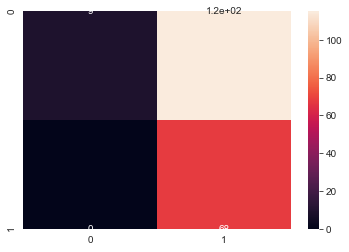

In [88]:
import seaborn as sns
sns.heatmap(conf, annot=True)
plt.show()

### Calculate your alpha / power / precision / accuracy
(Don't use any library for this exercise, in real life you can though)

In [89]:
alpha = (FP/(FP+TN)) # FPR
precision = TP/(TP + FP)
recall = TP/(TP + FN) # TPR, sensittivity, Power
accuracy = (TP + TN)/(TP + FP + TN + FN)
f1_score = 2*(precision * recall) / (precision + recall)

precision, f1_score.round(2), accuracy

AttributeError: 'float' object has no attribute 'round'

### Explain in non-technical terms your alpha / power / precision / accuracy

In [90]:
# 
# 
# 
# 
# 

# Actionable problem solving recommendations

### Write a brief paragraph telling your stakeholders something they can **DO** to be better off based on your model

In [91]:
# 
# 
# 
# 
# 

In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled,y_train_s)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [97]:
train_prob = model.predict_proba(X_train_scaled[:,1])
val_prob = model.predict_proba(X_val_scaled[:,1])

train_fp, train_tp, trai_threshold = roc_auc_score(y_train_s,train_prob)
val_fp, val_tp, val_threshold = roc_auc_score(y_val,val_prob)


ValueError: Expected 2D array, got 1D array instead:
array=[ 1.1086124  -0.28548974  2.0689938   0.21019101  0.08627082  0.51999146
  0.2721511   1.1395924   1.3254727  -0.06862941 -1.2148912   0.30313116
  0.5509715  -0.1925496  -0.8431306  -0.7811705  -0.2545097  -1.121951
 -0.5952902   0.860772   -0.99803084 -0.7811705  -0.09960946 -1.4317515
  1.3874328   0.11725087 -1.2458712   0.11725087 -0.47137    -0.9050907
 -0.93607074 -1.9584123   0.9227321  -1.0290109   0.42705134 -1.5246916
 -0.03764936 -0.16156955  2.130954   -0.7811705  -0.03764936 -0.09960946
 -0.7811705  -0.06862941  1.8521335  -0.16156955  2.0380137   1.2944926
  2.4097743  -0.4094099   0.2721511  -1.6486118   0.95371217  0.48901144
 -0.47137     0.3341112   1.3254727   2.285854   -0.44038996 -0.62627023
  0.17921096 -0.68823034  0.64391166 -3.7242749  -0.6572503  -0.1305895
 -0.00666932  1.542333   -0.5952902  -0.28548974 -0.6572503   0.11725087
  0.17921096  0.6129316   0.7988119   0.36509123 -0.7192104  -3.7242749
 -1.9893923   0.3341112  -1.2148912  -1.2768512  -0.34744984  1.8211534
 -1.9584123   1.9450736  -0.6572503   0.64391166  1.8211534   0.48901144
  0.36509123 -0.7811705   0.14823093  0.70587176  0.39607129 -0.99803084
 -1.4627315  -0.62627023  0.7988119   2.192914    0.48901144 -0.34744984
  0.11725087 -0.93607074 -0.87411064  1.9140936   1.8831135  -0.47137
  0.02431073 -0.28548974 -0.81215054 -0.34744984 -1.1529311   0.9227321
  0.36509123 -1.3697914   2.099974   -0.09960946 -0.1925496   1.9760537
 -0.00666932  0.21019101  0.05529078 -0.5333301  -1.1839111   0.4580314
  0.39607129  1.1705725   1.4803729  -0.62627023  0.5509715  -0.03764936
  0.2721511   0.2721511   2.0689938  -0.5952902  -0.2545097   2.285854
 -0.7192104   0.58195156  0.7368518  -1.090971    1.4803729   1.0776323
  0.14823093 -0.16156955  1.4803729   0.30313116 -0.9670508   0.17921096
  0.3341112   0.70587176 -0.81215054  0.48901144  0.24117106  0.3341112
 -1.4317515   1.8521335   1.2944926  -1.2148912  -0.1305895  -0.75019044
  0.05529078  1.6662532   0.2721511  -0.7811705   1.6972333  -0.44038996
 -0.5952902  -0.9050907  -1.0599909   1.8521335   1.9760537   0.95371217
  0.51999146  1.6352732   0.7988119   0.11725087 -0.99803084  1.4184128
  0.7368518  -0.5952902  -0.87411064 -0.62627023  0.7368518  -0.87411064
 -1.4627315   0.58195156 -0.2545097   1.9450736  -0.87411064 -1.0290109
  0.11725087 -0.7192104   0.11725087 -0.16156955 -0.4094099   0.58195156
  0.7988119  -0.62627023 -0.44038996 -0.99803084  1.5733131   0.42705134
 -0.4094099  -0.2545097  -3.7242749  -0.1305895  -0.5023501  -0.62627023
  0.76783186 -1.4007714  -0.6572503   1.4803729  -0.03764936 -1.5246916
 -1.2458712  -0.3784299   0.39607129 -0.3784299  -0.44038996 -0.28548974
 -0.87411064 -0.2545097   0.82979196 -0.5333301   0.82979196  0.82979196
  0.98469216 -0.9050907  -0.1305895  -1.6176318   0.2721511  -0.3164698
  0.02431073  1.1705725  -0.5023501   1.8831135   0.08627082  1.0466523
  0.14823093  0.08627082 -0.9050907  -0.81215054 -0.8431306   0.76783186
 -1.7105719  -0.7811705   0.76783186  0.30313116 -0.09960946  0.2721511
 -0.6572503   1.0466523   0.24117106  0.2721511   0.39607129 -0.6572503
 -0.5333301   1.8831135  -0.47137    -1.1529311  -1.3078313   2.3168342
 -1.0290109   0.24117106  0.24117106  0.7988119  -0.1925496   0.2721511
 -0.5333301  -0.34744984 -1.121951   -0.56431013  0.05529078 -0.1925496
 -0.34744984 -0.28548974  0.82979196  2.161934   -0.7192104   0.4580314
 -0.9050907  -0.44038996  0.17921096 -0.1925496  -0.09960946  0.89175206
 -0.7192104  -0.00666932  0.24117106 -0.8431306  -1.1839111  -0.9670508
  0.6748917  -3.7242749  -1.090971   -0.4094099  -0.62627023 -0.56431013
  1.8211534   1.7591933  -0.93607074 -1.2768512   1.1705725   1.3874328
 -1.0290109  -0.5952902   1.511353    0.08627082 -0.9670508  -0.3784299
  1.6352732   0.30313116  0.51999146  1.8521335   0.98469216  0.30313116
  1.2944926  -0.44038996  0.51999146 -0.44038996  0.7368518  -1.121951
  2.0689938  -0.1305895   0.2721511  -0.62627023 -0.03764936 -1.0599909
 -1.4007714   0.95371217 -0.6572503  -0.7811705   1.1086124   1.2015525
  0.21019101 -0.93607074 -1.0599909  -1.803512    0.64391166 -0.5023501
 -0.62627023 -0.87411064 -0.81215054 -0.1925496   2.0689938  -1.4317515
 -0.34744984 -0.6572503   1.7282133  -0.00666932 -0.47137     0.51999146
 -0.9050907  -0.3784299   2.130954   -1.121951   -0.47137    -0.00666932
  0.6129316  -0.47137    -0.3164698  -0.09960946  0.39607129  1.3874328
 -0.34744984 -0.22352964  0.14823093  0.08627082 -0.06862941  0.2721511
 -0.93607074  0.14823093  0.30313116  1.2635126   2.3787942  -0.9670508
 -0.34744984  0.42705134  0.82979196 -0.03764936 -0.99803084  0.14823093
 -0.56431013  0.14823093  0.24117106 -0.7811705  -0.47137    -0.87411064
  0.11725087 -0.62627023 -0.93607074 -0.28548974 -0.5023501   0.30313116
 -0.00666932 -0.56431013  0.5509715   0.70587176 -0.8431306  -0.3784299
 -0.6572503  -0.99803084 -1.5246916   0.6748917   0.05529078  0.17921096
 -0.56431013 -0.56431013 -0.56431013 -1.2148912   0.14823093  0.11725087
 -0.47137     0.70587176  0.58195156 -0.9670508   1.1705725   2.3787942
 -0.2545097   0.5509715  -0.28548974 -0.5333301   0.14823093  0.48901144
  0.2721511   1.1086124   0.08627082 -1.2458712  -0.93607074  0.36509123].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [94]:
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fp, train_tp, color='darkorange',lw=3, label='Training')
plt.plot(val_fp, val_tp, color='darkgreen',lw=3, label='Validation')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

NameError: name 'train_fp' is not defined

<Figure size 720x576 with 0 Axes>

In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [101]:
mse = mean_squared_error(y_train_s, y_train_log_las)
mae = mean_absolute_error(y_train_s, y_train_log_las)
r2 = r2_score(y_train_s, y_train_log_las)

In [102]:
mse, mae, r2

(0.2361111111111111, 0.2361111111111111, -0.04498778665781322)